### For data preprocessing which includes CLAHE enchancement, balancing the dataset using Undersampling & Oversampling techniques, check out [this notebook](https://www.kaggle.com/code/rahulogoel/chest-x-rays-eda-clahe-enchanced-balanced).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from os import listdir
import pickle
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense, Reshape
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers

%matplotlib inline

E0000 00:00:1730224559.006600      13 common_lib.cc:798] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: === 
learning/45eac/tfrc/runtime/common_lib.cc:479
D1029 17:55:59.015232089      13 config.cc:196]                        gRPC EXPERIMENT call_status_override_on_cancellation   OFF (default:OFF)
D1029 17:55:59.015247188      13 config.cc:196]                        gRPC EXPERIMENT call_v3                                OFF (default:OFF)
D1029 17:55:59.015250692      13 config.cc:196]                        gRPC EXPERIMENT canary_client_privacy                  ON  (default:ON)
D1029 17:55:59.015253243      13 config.cc:196]                        gRPC EXPERIMENT capture_base_context                   ON  (default:ON)
D1029 17:55:59.015255950      13 config.cc:196]                        gRPC EXPERIMENT client_idleness                        ON  (defa

In [ ]:
print("Tensorflow version " + tf.__version__)
AUTO = tf.data.experimental.AUTOTUNE

# Detect TPU, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() 

print("REPLICAS: ", strategy.num_replicas_in_sync)

Tensorflow version 2.16.1
Running on TPU  
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


I0000 00:00:1730224580.680806      13 service.cc:145] XLA service 0x5a1a85eec5f0 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730224580.680858      13 service.cc:153]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1730224580.680862      13 service.cc:153]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1730224580.680865      13 service.cc:153]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1730224580.680868      13 service.cc:153]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1730224580.680871      13 service.cc:153]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1730224580.680874      13 service.cc:153]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1730224580.680876      13 service.cc:153]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1730224580.680879      13 service.cc:153]   StreamExecutor device (7): TPU, 2a886c8


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


REPLICAS:  8


In [ ]:
df = pd.read_csv("../input/nih-balanced-and-resized-chest-x-rays/new_labels.csv")

In [ ]:
df.head()

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
data = df.sample(frac=1).reset_index(drop=True)

In [ ]:
data.head()

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00015737_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,00019922_000.png,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0
2,00004822_037.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00019124_067.png,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,666497836083.png,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
from tqdm import tqdm

In [ ]:
X = []
for i in tqdm(range(data.shape[0])):
    path = '../input/nih-balanced-and-resized-chest-x-rays/resized_images/resized_images/' + data['Path'][i][:12] +".png"
    img = image.load_img(path, target_size=(224, 224, 3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)

100%|██████████| 51382/51382 [10:15<00:00, 83.42it/s]


In [ ]:
X = np.array(X)
X.shape

(51382, 224, 224, 3)

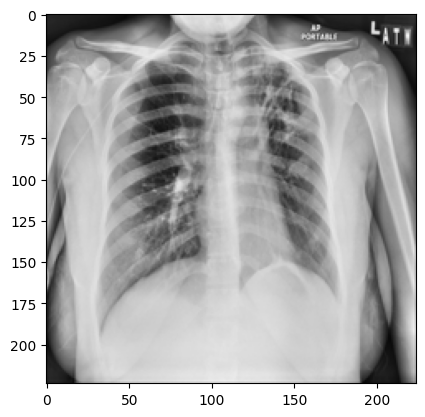

In [ ]:
plt.imshow(X[1])

In [ ]:
y = data.drop("Path", axis = 1)
y = y.to_numpy()
y.shape

(51382, 15)

In [ ]:
print(y[0])
y

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.18, shuffle =True)

In [ ]:
(X_train.shape, y_train.shape), (X_val.shape, y_val.shape), (X_test.shape, y_test.shape)

(((35812, 224, 224, 3), (35812, 15)),
 ((7862, 224, 224, 3), (7862, 15)),
 ((7708, 224, 224, 3), (7708, 15)))

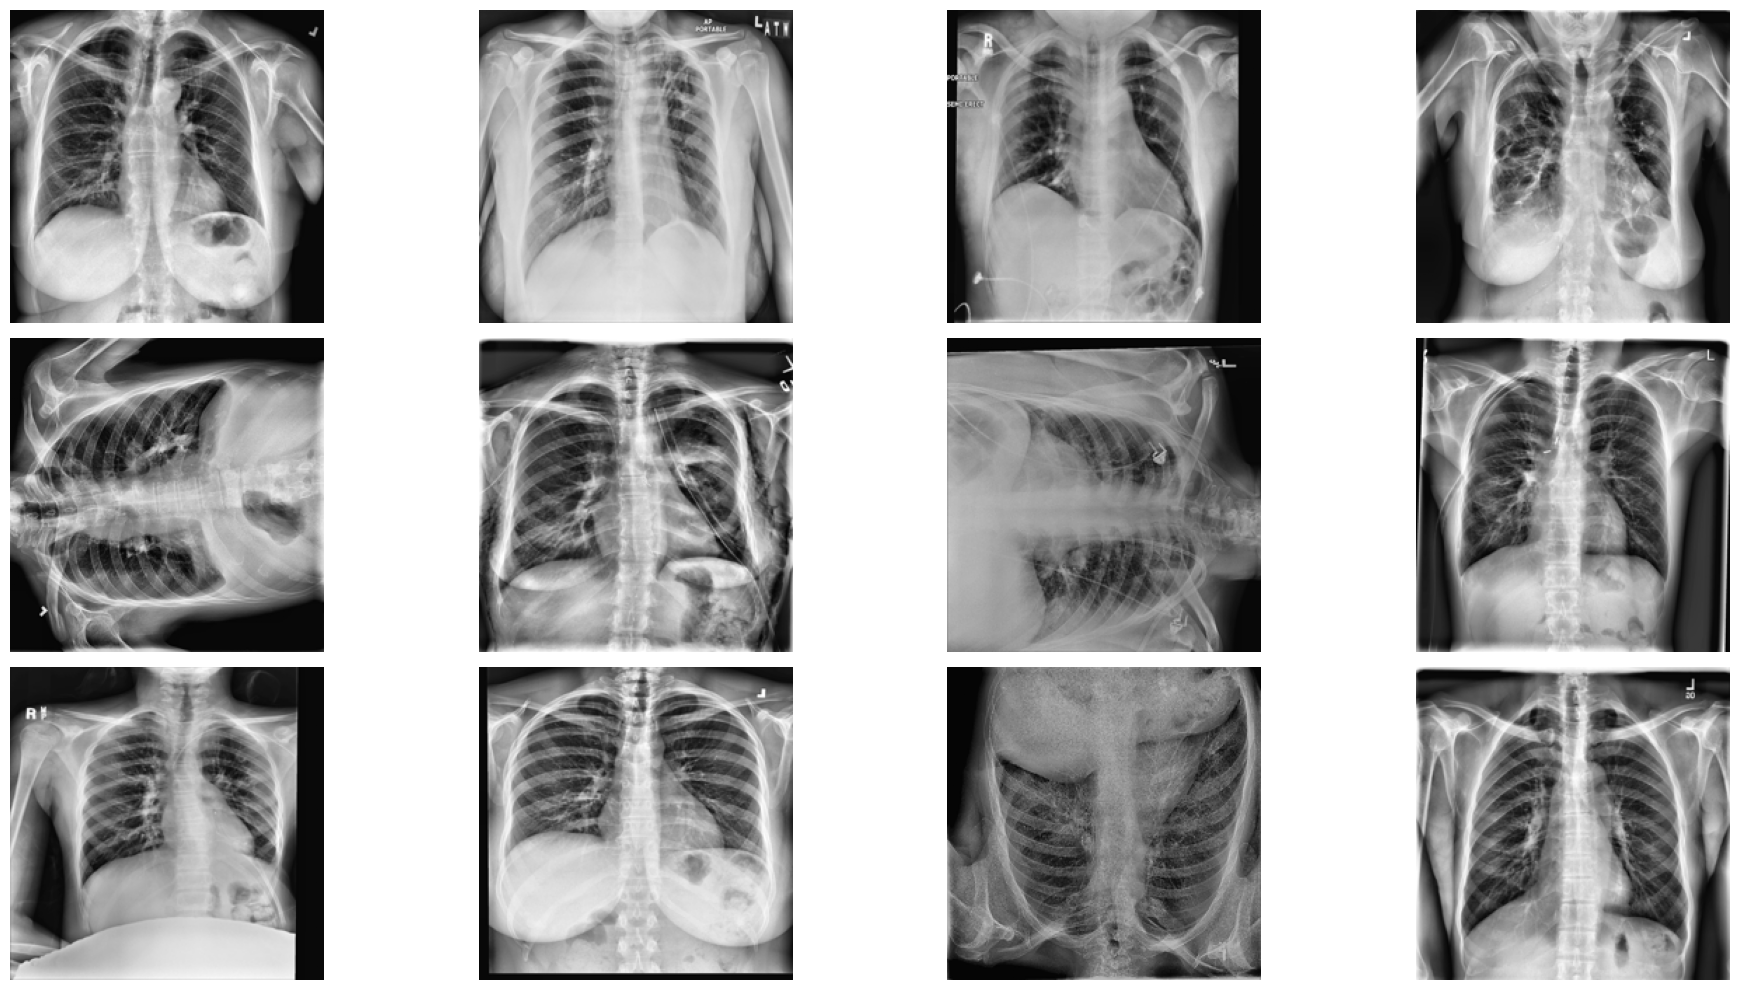

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(20,10))
axes = axes.flatten()
for img, ax in zip(X, axes):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import keras
from keras.applications.densenet import DenseNet121
from keras.models import Model
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau, EarlyStopping, TensorBoard
from keras.preprocessing import image

Model = 1 (epochs = 50, batch size = 64, learning rate = default(0.001))

In [ ]:
from keras import backend as K
K.clear_session()

In [ ]:
with strategy.scope():
    base_model = DenseNet121(weights='imagenet', include_top=False)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(15, activation="sigmoid")(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    opt = tf.keras.optimizers.Adam()
    model.compile(loss="binary_crossentropy", 
                  optimizer = opt,
                  metrics = ["binary_accuracy", 
                             "f1_score",
                             tf.keras.metrics.Recall(),
                             tf.keras.metrics.Precision(),
                             tf.keras.metrics.AUC])

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train, 
    batch_size = 64,
    validation_data = (X_val, y_val),
    steps_per_epoch = len(X_train) // 64,
    epochs = 50,
    verbose=1 )

Epoch 1/50


2024-10-29 19:19:25.367801: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1730229570.002445     819 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(b644e90745d7f951:0:0), session_name()
I0000 00:00:1730229607.098642     819 tpu_compile_op_common.cc:245] Compilation of b644e90745d7f951:0:0 with session name  took 37.096152312s and succeeded
I0000 00:00:1730229607.231892     819 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(b644e90745d7f951:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_3133787414744224014", property.function_library_fingerprint = 9508363644894218631, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z =

558/559 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - auc: 0.7092 - binary_accuracy: 0.8931 - f1_score: 0.2025 - loss: 0.3060 - precision: 0.4165 - recall: 0.0755

I0000 00:00:1730229678.821425     773 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(999b3c4abc5a054d:0:0), session_name()
I0000 00:00:1730229719.551358     773 tpu_compile_op_common.cc:245] Compilation of 999b3c4abc5a054d:0:0 with session name  took 40.72988782s and succeeded
I0000 00:00:1730229719.720009     773 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(999b3c4abc5a054d:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_3133787414744224014", property.function_library_fingerprint = 9508363644894218631, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "5,224,224,3,;5,15,;", property.guaranteed_constants_size = 0, embed

559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - auc: 0.7093 - binary_accuracy: 0.8931 - f1_score: 0.2025 - loss: 0.3060 - precision: 0.4168 - recall: 0.0756

2024-10-29 19:22:08.480966: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add/ReadVariableOp.
I0000 00:00:1730229729.721121     798 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(312c8d425e4e4b0b:0:0), session_name()
I0000 00:00:1730229736.544282     798 tpu_compile_op_common.cc:245] Compilation of 312c8d425e4e4b0b:0:0 with session name  took 6.823062457s and succeeded
I0000 00:00:1730229736.569942     798 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(312c8d425e4e4b0b:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_16379944256143137525", property.function_library_fingerprint = 11736786364085632292, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, 

559/559 ━━━━━━━━━━━━━━━━━━━━ 209s 253ms/step - auc: 0.7093 - binary_accuracy: 0.8931 - f1_score: 0.2026 - loss: 0.3060 - precision: 0.4170 - recall: 0.0756 - val_auc: 0.5741 - val_binary_accuracy: 0.8614 - val_f1_score: 0.0665 - val_loss: 0.5869 - val_precision: 0.1777 - val_recall: 0.1103
Epoch 2/50


I0000 00:00:1730229748.641650     755 tpu_compile_op_common.cc:245] Compilation of 605163e9b0917d79:0:0 with session name  took 7.764141659s and succeeded
I0000 00:00:1730229748.663666     755 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(605163e9b0917d79:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_16379944256143137525", property.function_library_fingerprint = 11736786364085632292, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "7,224,224,3,;7,15,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1730229748.663699     755 tpu_compilation_cache_interface.cc:541] After adding entry for key

559/559 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - auc: 0.0000e+00 - binary_accuracy: 0.0000e+00 - f1_score: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_auc: 0.5741 - val_binary_accuracy: 0.8614 - val_f1_score: 0.0665 - val_loss: 0.5869 - val_precision: 0.1777 - val_recall: 0.1103
Epoch 3/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 78s 139ms/step - auc: 0.8059 - binary_accuracy: 0.9095 - f1_score: 0.3124 - loss: 0.2577 - precision: 0.6780 - recall: 0.1644 - val_auc: 0.7294 - val_binary_accuracy: 0.9044 - val_f1_score: 0.1926 - val_loss: 0.3178 - val_precision: 0.5565 - val_recall: 0.1719
Epoch 4/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - auc: 0.8685 - binary_accuracy: 0.9333 - f1_score: 0.0667 - loss: 0.1798 - precision: 0.5000 - recall: 0.3996 - val_auc: 0.7611 - val_binary_accuracy: 0.9031 - val_f1_score: 0.2060 - val_loss: 0.2919 - val_precision: 0.5271 - val_recall: 0.2062
Epoch 5/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 78s 139ms/step - auc: 0.8376 - binary_accuracy: 

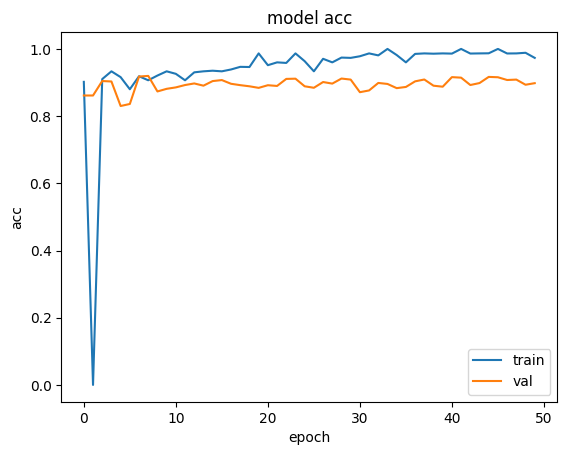

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

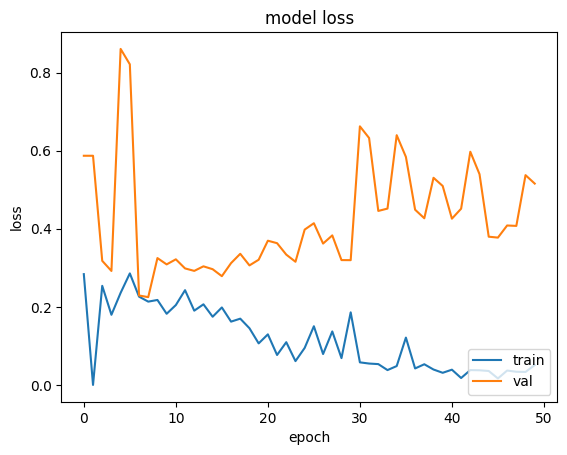

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

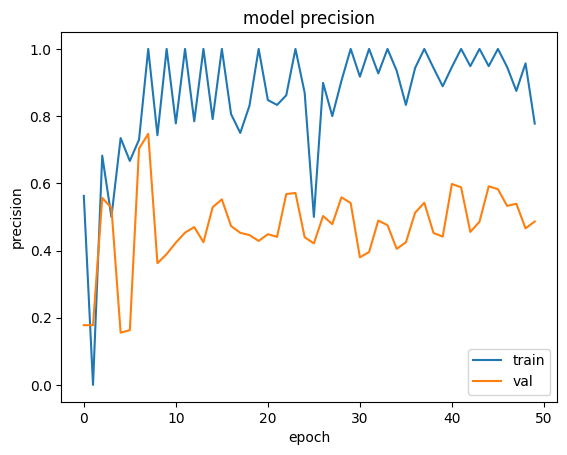

In [ ]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

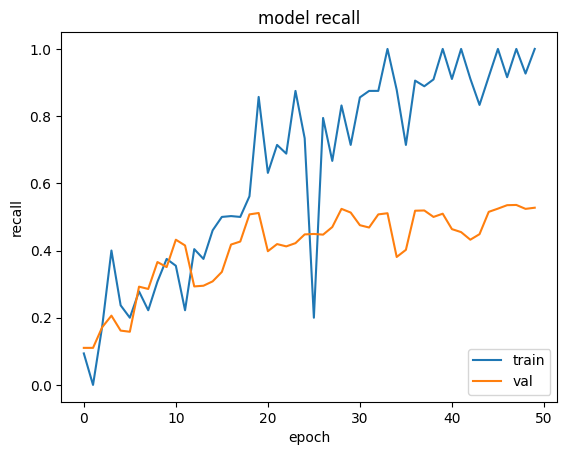

In [ ]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

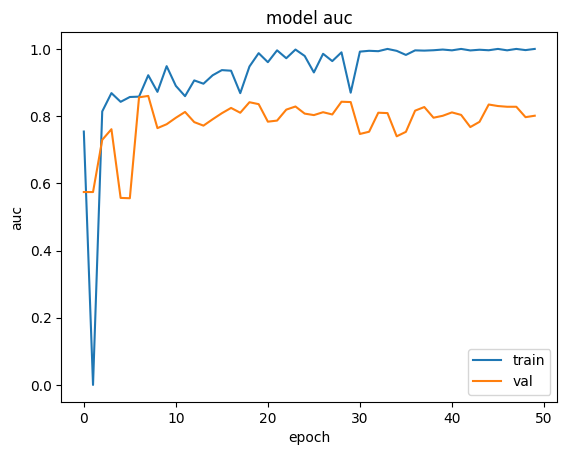

In [ ]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test, return_dict = True)

I0000 00:00:1730231956.895632     803 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(68750eca26ee16b6:0:0), session_name()


  5/241 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - auc: 0.7917 - binary_accuracy: 0.8979 - f1_score: 0.2185 - loss: 0.5266 - precision: 0.5043 - recall: 0.5132  

I0000 00:00:1730231971.959096     803 tpu_compile_op_common.cc:245] Compilation of 68750eca26ee16b6:0:0 with session name  took 15.063322681s and succeeded
I0000 00:00:1730231971.985907     803 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(68750eca26ee16b6:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_16379944256143137525", property.function_library_fingerprint = 11736786364085632292, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "4,224,224,3,;4,15,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1730231971.985957     803 tpu_compilation_cache_interface.cc:541] After adding entry for ke

241/241 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - auc: 0.7880 - binary_accuracy: 0.8932 - f1_score: 0.3349 - loss: nan - precision: 0.4699 - recall: 0.4942 


In [ ]:
scores

{'auc': 0.778645932674408,
 'binary_accuracy': 0.8912861943244934,
 'f1_score': <tf.Tensor: shape=(15,), dtype=float32, numpy=
 array([0.2307692 , 0.5034964 , 0.15217389, 0.51612896, 0.30057797,
        0.4036697 , 0.44531247, 0.8852458 , 0.28828824, 0.11999998,
        0.3193277 , 0.06451611, 0.30136982, 0.47692305, 0.17599995],
       dtype=float32)>,
 'loss': 0.5767728090286255,
 'precision': 0.4520367980003357,
 'recall': 0.48246845602989197}

Model = 2 (epochs = 20, batch size = 64, learning rate = 1e-4)

In [ ]:
from keras import backend as K
K.clear_session()

In [ ]:
with strategy.scope():
    base_model = DenseNet121(weights='imagenet', include_top=False)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(15, activation="sigmoid")(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    opt = tf.keras.optimizers.Adam(learning_rate = 1e-4)
    model.compile(loss="binary_crossentropy", 
                  optimizer = opt,
                  metrics = ["binary_accuracy", 
                             "f1_score",
                             tf.keras.metrics.Recall(),
                             tf.keras.metrics.Precision(),
                             tf.keras.metrics.AUC])

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train, 
    batch_size = 64,
    validation_data = (X_val, y_val),
    steps_per_epoch = len(X_train) // 64,
    epochs = 20,
    verbose=1 )

Epoch 1/20


2024-10-29 20:19:18.846461: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1730233163.236169     797 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(1a4feab7794e419a:0:0), session_name()
I0000 00:00:1730233201.753860     797 tpu_compile_op_common.cc:245] Compilation of 1a4feab7794e419a:0:0 with session name  took 38.517638405s and succeeded
I0000 00:00:1730233201.899978     797 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(1a4feab7794e419a:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_850866438299054616", property.function_library_fingerprint = 17037390393111373134, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z =

558/559 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - auc: 0.6968 - binary_accuracy: 0.8745 - f1_score: 0.2083 - loss: 0.3316 - precision: 0.3325 - recall: 0.1245

I0000 00:00:1730233277.083030     829 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(28ca8fed3f27fb43:0:0), session_name()
I0000 00:00:1730233322.060141     829 tpu_compile_op_common.cc:245] Compilation of 28ca8fed3f27fb43:0:0 with session name  took 44.977055081s and succeeded
I0000 00:00:1730233322.204936     829 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(28ca8fed3f27fb43:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_850866438299054616", property.function_library_fingerprint = 17037390393111373134, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "5,224,224,3,;5,15,;", property.guaranteed_constants_size = 0, embe

559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - auc: 0.6969 - binary_accuracy: 0.8746 - f1_score: 0.2085 - loss: 0.3315 - precision: 0.3328 - recall: 0.1245

2024-10-29 20:22:12.525164: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add/ReadVariableOp.


559/559 ━━━━━━━━━━━━━━━━━━━━ 205s 245ms/step - auc: 0.6970 - binary_accuracy: 0.8746 - f1_score: 0.2086 - loss: 0.3314 - precision: 0.3331 - recall: 0.1245 - val_auc: 0.8320 - val_binary_accuracy: 0.9148 - val_f1_score: 0.3137 - val_loss: 0.2417 - val_precision: 0.6933 - val_recall: 0.2493
Epoch 2/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - auc: 0.0000e+00 - binary_accuracy: 0.0000e+00 - f1_score: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_auc: 0.8320 - val_binary_accuracy: 0.9148 - val_f1_score: 0.3137 - val_loss: 0.2417 - val_precision: 0.6933 - val_recall: 0.2493
Epoch 3/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 84s 150ms/step - auc: 0.8576 - binary_accuracy: 0.9174 - f1_score: 0.3844 - loss: 0.2290 - precision: 0.7647 - recall: 0.2395 - val_auc: 0.8060 - val_binary_accuracy: 0.9122 - val_f1_score: 0.3103 - val_loss: 0.2610 - val_precision: 0.6356 - val_recall: 0.2664
Epoch 4/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - auc: 0.7316 - binary_accuracy:

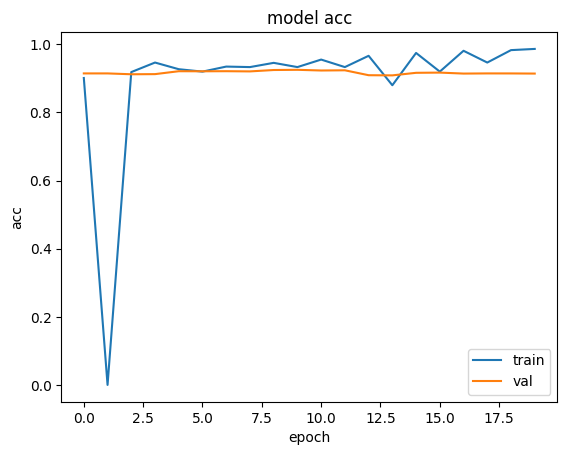

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

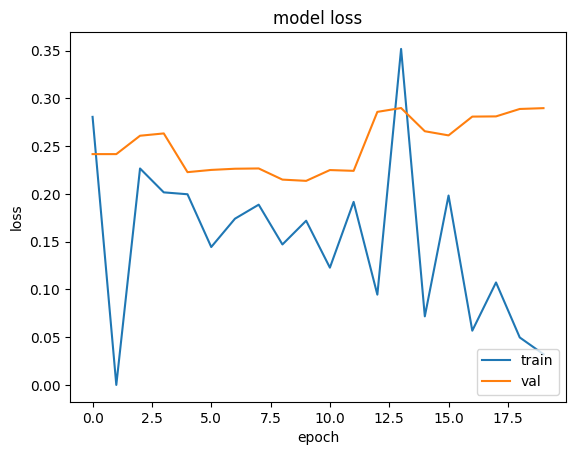

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

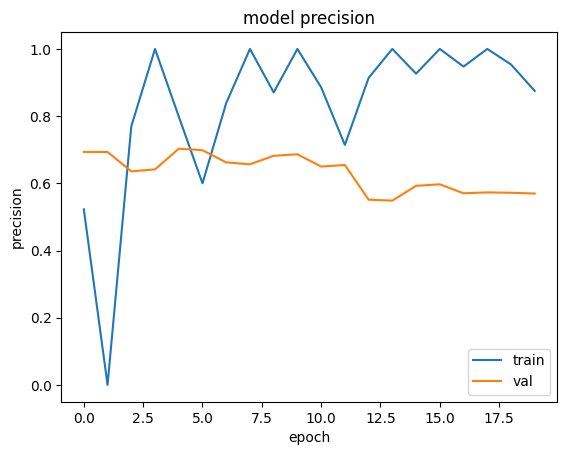

In [ ]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

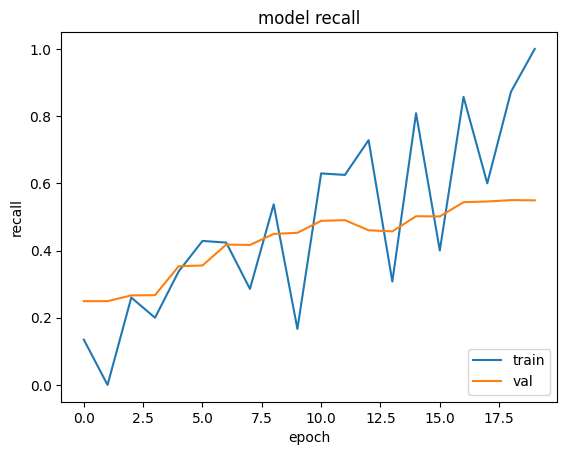

In [ ]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

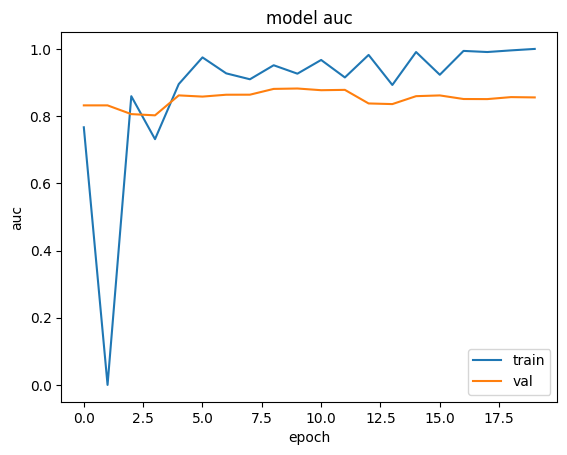

In [ ]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test, return_dict = True)

241/241 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - auc: 0.8536 - binary_accuracy: 0.9126 - f1_score: 0.4057 - loss: nan - precision: 0.5687 - recall: 0.5423  


In [ ]:
scores

{'auc': 0.84206223487854,
 'binary_accuracy': 0.9109265208244324,
 'f1_score': <tf.Tensor: shape=(15,), dtype=float32, numpy=
 array([0.24778756, 0.4615384 , 0.19047615, 0.4805194 , 0.3842794 ,
        0.4925373 , 0.43537414, 0.8129032 , 0.3009708 , 0.34920633,
        0.33986923, 0.28409085, 0.33513507, 0.49777773, 0.3552631 ],
       dtype=float32)>,
 'loss': 0.30463385581970215,
 'precision': 0.5518797039985657,
 'recall': 0.5147265195846558}

Model = 3 (epochs = 50, batch size = 64, learning rate = 1e-4)

In [ ]:
from keras import backend as K
K.clear_session()

In [ ]:
with strategy.scope():
    base_model = DenseNet121(weights='imagenet', include_top=False)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(15, activation="sigmoid")(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    opt = tf.keras.optimizers.Adam(learning_rate = 1e-4)
    model.compile(loss="binary_crossentropy", 
                  optimizer = opt,
                  metrics = ["binary_accuracy", 
                             "f1_score",
                             tf.keras.metrics.Recall(),
                             tf.keras.metrics.Precision(),
                             tf.keras.metrics.AUC])

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train, 
    batch_size = 64,
    validation_data = (X_val, y_val),
    steps_per_epoch = len(X_train) // 64,
    epochs = 50,
    verbose=1 )

Epoch 1/50


2024-10-29 20:44:28.841814: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1730234673.216644     792 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(27ba98ca1ba68e0:0:0), session_name()
I0000 00:00:1730234715.738835     792 tpu_compile_op_common.cc:245] Compilation of 27ba98ca1ba68e0:0:0 with session name  took 42.52209203s and succeeded
I0000 00:00:1730234715.915853     792 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(27ba98ca1ba68e0:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_6157826818381851820", property.function_library_fingerprint = 5835598458459241389, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, 

558/559 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - auc: 0.6958 - binary_accuracy: 0.8752 - f1_score: 0.2082 - loss: 0.3303 - precision: 0.3224 - recall: 0.1145

I0000 00:00:1730234792.266238     816 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(9bd56449ebcc5901:0:0), session_name()
I0000 00:00:1730234836.231603     816 tpu_compile_op_common.cc:245] Compilation of 9bd56449ebcc5901:0:0 with session name  took 43.965312918s and succeeded
I0000 00:00:1730234836.399846     816 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(9bd56449ebcc5901:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_6157826818381851820", property.function_library_fingerprint = 5835598458459241389, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "5,224,224,3,;5,15,;", property.guaranteed_constants_size = 0, embe

559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - auc: 0.6959 - binary_accuracy: 0.8753 - f1_score: 0.2083 - loss: 0.3303 - precision: 0.3228 - recall: 0.1145

2024-10-29 20:47:27.554340: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add/ReadVariableOp.


559/559 ━━━━━━━━━━━━━━━━━━━━ 210s 246ms/step - auc: 0.6960 - binary_accuracy: 0.8753 - f1_score: 0.2084 - loss: 0.3302 - precision: 0.3231 - recall: 0.1145 - val_auc: 0.8386 - val_binary_accuracy: 0.9145 - val_f1_score: 0.3408 - val_loss: 0.2409 - val_precision: 0.7352 - val_recall: 0.2130
Epoch 2/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - auc: 0.0000e+00 - binary_accuracy: 0.0000e+00 - f1_score: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_auc: 0.8386 - val_binary_accuracy: 0.9145 - val_f1_score: 0.3408 - val_loss: 0.2409 - val_precision: 0.7352 - val_recall: 0.2130
Epoch 3/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 83s 147ms/step - auc: 0.8568 - binary_accuracy: 0.9176 - f1_score: 0.3908 - loss: 0.2296 - precision: 0.7734 - recall: 0.2401 - val_auc: 0.8741 - val_binary_accuracy: 0.9221 - val_f1_score: 0.3789 - val_loss: 0.2174 - val_precision: 0.7415 - val_recall: 0.3281
Epoch 4/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - auc: 0.9388 - binary_accuracy:

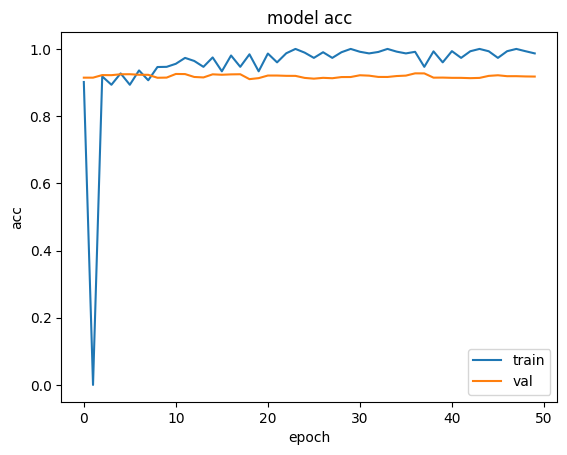

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

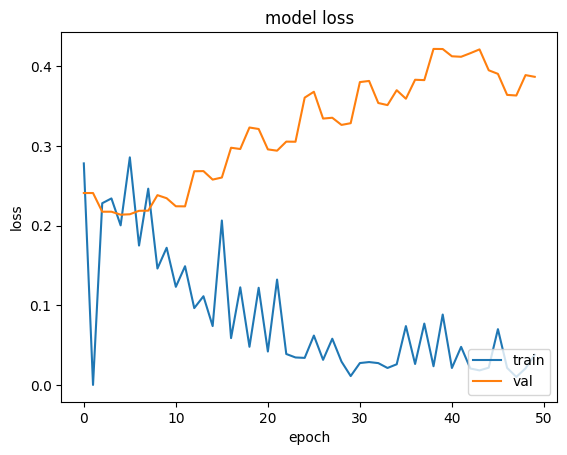

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

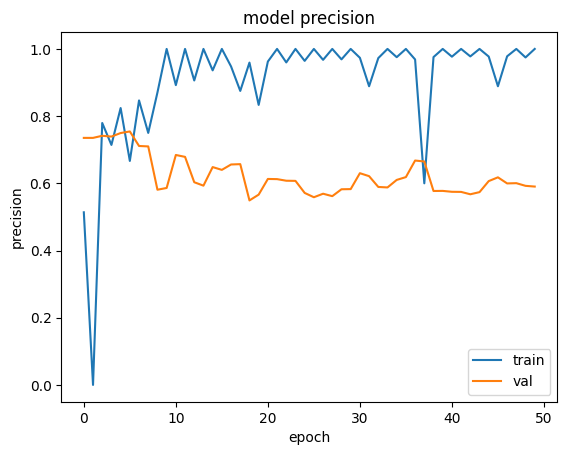

In [ ]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

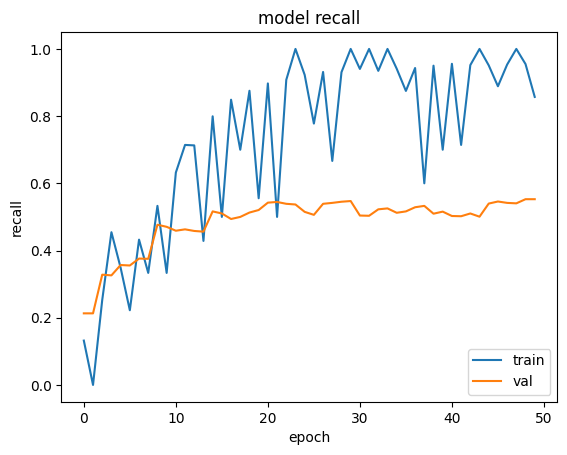

In [ ]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

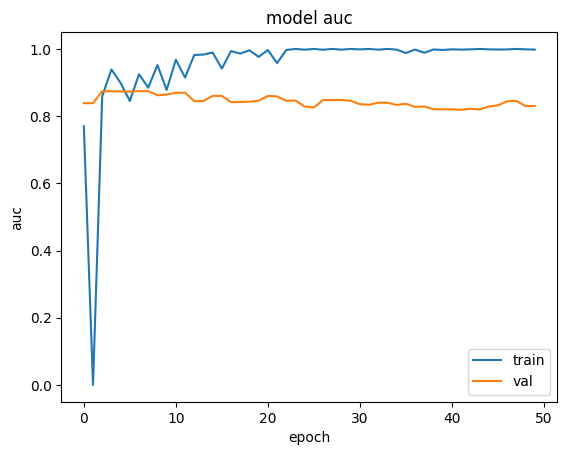

In [ ]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test, return_dict = True)

241/241 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - auc: 0.8243 - binary_accuracy: 0.9137 - f1_score: 0.3928 - loss: nan - precision: 0.5765 - recall: 0.5295  


In [ ]:
scores

{'auc': 0.8207404613494873,
 'binary_accuracy': 0.9107878804206848,
 'f1_score': <tf.Tensor: shape=(15,), dtype=float32, numpy=
 array([0.23762374, 0.54976296, 0.17142853, 0.60256404, 0.37558678,
        0.56209147, 0.5125    , 0.77551013, 0.34951448, 0.4179104 ,
        0.39751548, 0.13207544, 0.3744292 , 0.44067794, 0.2978723 ],
       dtype=float32)>,
 'loss': 0.40225476026535034,
 'precision': 0.5509744882583618,
 'recall': 0.5154277682304382}

Model = 4 (epochs = 20, batch size = 128, learning rate = 0.001)

In [ ]:
# Initialize hyperparameters.
EPOCHS = 20
BS = 128

In [ ]:
from keras import backend as K
K.clear_session()

In [ ]:
with strategy.scope():
    base_model = DenseNet121(weights='imagenet', include_top=False)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(15, activation="sigmoid")(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    opt = tf.keras.optimizers.Adam()
    model.compile(loss="binary_crossentropy", 
                  optimizer = opt,
                  metrics = ["binary_accuracy", 
                             "f1_score",
                             tf.keras.metrics.Recall(),
                             tf.keras.metrics.Precision(),
                             tf.keras.metrics.AUC])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, None,      │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,408 │ zero_padding2d[0… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, None,      │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, None,      │          0 │ conv2_block1_0_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, None,      │          0 │ pool1[0][0],      │
│ (Concatenate)       │ None, 96)         │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, None,      │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, None,      │          0 │ conv2_block2_0_b… │
│ (Activation)        │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, None,      │     12,288 │ conv2_block2_0_r

 Total params: 7,052,879 (26.90 MB)

 Trainable params: 6,969,231 (26.59 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train, 
    batch_size = BS,
    validation_data = (X_val, y_val),
    steps_per_epoch = len(X_train) // BS,
    epochs = 20,
    verbose=1)

Epoch 1/20


2024-10-27 19:05:02.592798: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1730055906.949404     822 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(e02011a70c3bc131:0:0), session_name()
I0000 00:00:1730055947.026469     822 tpu_compile_op_common.cc:245] Compilation of e02011a70c3bc131:0:0 with session name  took 40.076991311s and succeeded
I0000 00:00:1730055947.195228     822 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(e02011a70c3bc131:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_6601627552343630678", property.function_library_fingerprint = 15900894809277109699, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z 

239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - auc: 0.7084 - binary_accuracy: 0.8815 - f1_score: 0.2028 - loss: 0.3212 - precision: 0.3527 - recall: 0.0980

I0000 00:00:1730055986.151373     752 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(441637e54a0ba6b8:0:0), session_name()
I0000 00:00:1730056025.822291     752 tpu_compile_op_common.cc:245] Compilation of 441637e54a0ba6b8:0:0 with session name  took 39.670872428s and succeeded
I0000 00:00:1730056025.959608     752 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(441637e54a0ba6b8:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_6601627552343630678", property.function_library_fingerprint = 15900894809277109699, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "14,224,224,3,;14,15,;", property.guaranteed_constants_size = 0, e

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - auc: 0.7086 - binary_accuracy: 0.8816 - f1_score: 0.2030 - loss: 0.3210 - precision: 0.3534 - recall: 0.0981

2024-10-27 19:07:15.340046: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add/ReadVariableOp.
I0000 00:00:1730056036.502251     832 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(5a85f98e2bb2ce7f:0:0), session_name()
I0000 00:00:1730056045.309618     832 tpu_compile_op_common.cc:245] Compilation of 5a85f98e2bb2ce7f:0:0 with session name  took 8.807316201s and succeeded
I0000 00:00:1730056045.332569     832 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(5a85f98e2bb2ce7f:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_16379944256143137525", property.function_library_fingerprint = 11736786364085632292, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, 

240/240 ━━━━━━━━━━━━━━━━━━━━ 181s 460ms/step - auc: 0.7088 - binary_accuracy: 0.8817 - f1_score: 0.2033 - loss: 0.3208 - precision: 0.3542 - recall: 0.0981 - val_auc: 0.5591 - val_binary_accuracy: 0.8587 - val_f1_score: 0.0518 - val_loss: 0.4809 - val_precision: 0.1561 - val_recall: 0.0984
Epoch 2/20


I0000 00:00:1730056057.130860     789 tpu_compile_op_common.cc:245] Compilation of 98ed338f515bc4b9:0:0 with session name  took 7.689659733s and succeeded
I0000 00:00:1730056057.157447     789 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(98ed338f515bc4b9:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_16379944256143137525", property.function_library_fingerprint = 11736786364085632292, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "5,224,224,3,;5,15,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1730056057.157494     789 tpu_compilation_cache_interface.cc:541] After adding entry for key

240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - auc: 0.0000e+00 - binary_accuracy: 0.0000e+00 - f1_score: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_auc: 0.5591 - val_binary_accuracy: 0.8587 - val_f1_score: 0.0518 - val_loss: 0.4809 - val_precision: 0.1561 - val_recall: 0.0984
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 47s 194ms/step - auc: 0.8298 - binary_accuracy: 0.9122 - f1_score: 0.3434 - loss: 0.2452 - precision: 0.7010 - recall: 0.1985 - val_auc: 0.6034 - val_binary_accuracy: 0.9009 - val_f1_score: 0.0817 - val_loss: 0.4144 - val_precision: 0.4684 - val_recall: 0.0389
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - auc: 0.8539 - binary_accuracy: 0.9001 - f1_score: 0.3088 - loss: 0.2402 - precision: 0.5563 - recall: 0.2275 - val_auc: 0.6195 - val_binary_accuracy: 0.9025 - val_f1_score: 0.1042 - val_loss: 0.3840 - val_precision: 0.5781 - val_recall: 0.0389
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 46s 188ms/step - auc: 0.8603 - binary_accuracy: 

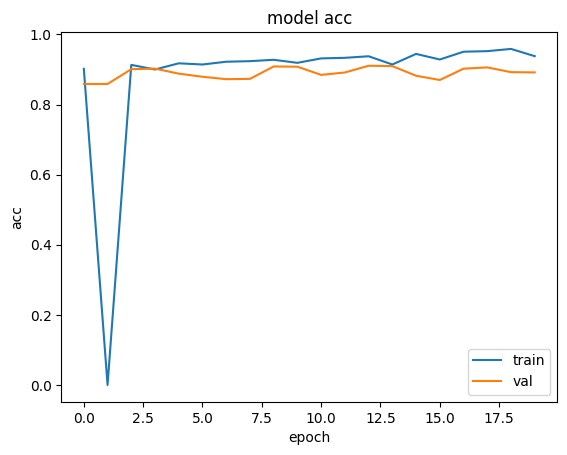

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

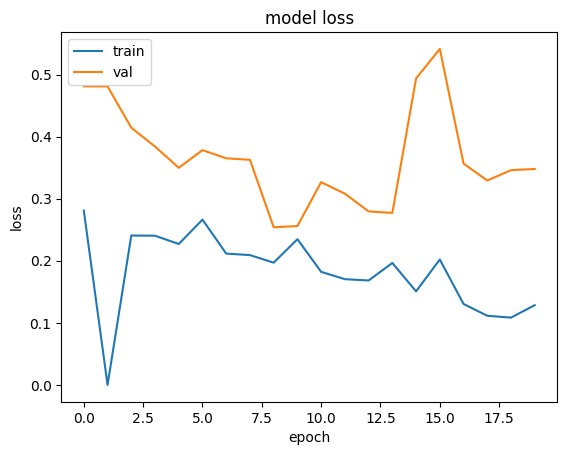

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

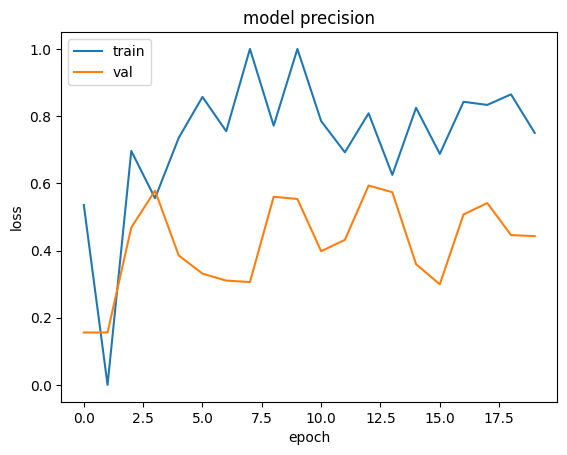

In [ ]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

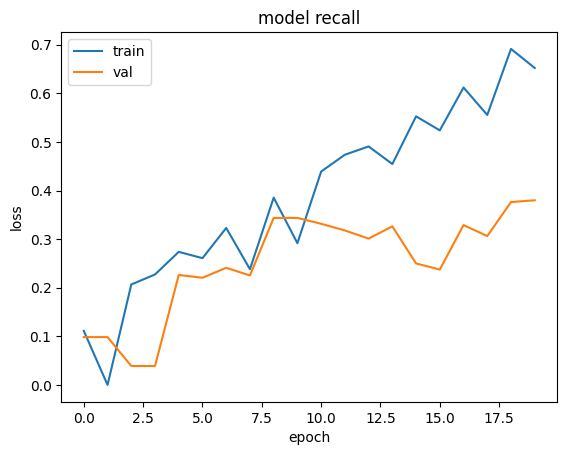

In [ ]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

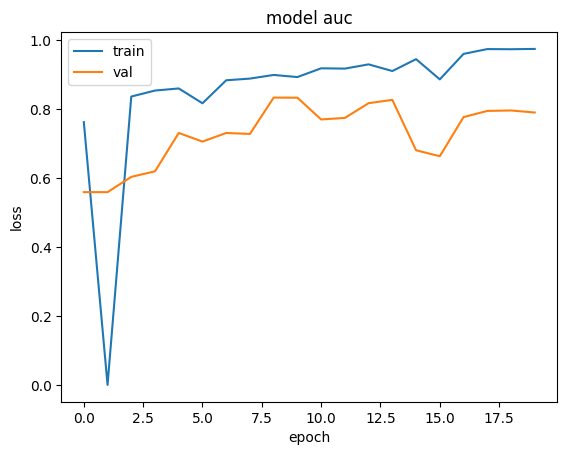

In [ ]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test, return_dict = True)

I0000 00:00:1730056743.251065     766 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(68750eca26ee16b6:0:0), session_name()


  5/322 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - auc: 0.7699 - binary_accuracy: 0.8914 - f1_score: 0.1522 - loss: 0.3572 - precision: 0.4056 - recall: 0.3303  

I0000 00:00:1730056753.921860     766 tpu_compile_op_common.cc:245] Compilation of 68750eca26ee16b6:0:0 with session name  took 10.670746531s and succeeded
I0000 00:00:1730056753.942941     766 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(68750eca26ee16b6:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_16379944256143137525", property.function_library_fingerprint = 11736786364085632292, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "4,224,224,3,;4,15,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1730056753.942975     766 tpu_compilation_cache_interface.cc:541] After adding entry for ke

321/322 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - auc: 0.8010 - binary_accuracy: 0.8946 - f1_score: 0.2915 - loss: 0.3412 - precision: 0.4627 - recall: 0.3892

I0000 00:00:1730056763.280854     748 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(1c250e167bb17dcb:0:0), session_name()


322/322 ━━━━━━━━━━━━━━━━━━━━ 30s 59ms/step - auc: 0.8009 - binary_accuracy: 0.8946 - f1_score: 0.2914 - loss: nan - precision: 0.4627 - recall: 0.3892 


I0000 00:00:1730056772.682515     748 tpu_compile_op_common.cc:245] Compilation of 1c250e167bb17dcb:0:0 with session name  took 9.40161548s and succeeded
I0000 00:00:1730056772.708665     748 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(1c250e167bb17dcb:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_16379944256143137525", property.function_library_fingerprint = 11736786364085632292, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "2,224,224,3,;2,15,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1730056772.708715     748 tpu_compilation_cache_interface.cc:541] After adding entry for key 

In [ ]:
scores

{'auc': 0.7815442681312561,
 'binary_accuracy': 0.8915172815322876,
 'f1_score': <tf.Tensor: shape=(15,), dtype=float32, numpy=
 array([0.10810807, 0.45933008, 0.11940295, 0.12698412, 0.2608695 ,
        0.35294113, 0.3184357 , 0.75      , 0.04878046, 0.26178002,
        0.15204675, 0.13333331, 0.20994471, 0.44541478, 0.31279615],
       dtype=float32)>,
 'loss': 0.3624464273452759,
 'precision': 0.440731406211853,
 'recall': 0.36731475591659546}

Model = 5 (epochs = 20, batch size = 1024 as [128 * TPU's 8 cores], learning rate = 0.001)

In [ ]:
from keras import backend as K
K.clear_session()

In [ ]:
with strategy.scope():
    base_model = DenseNet121(weights='imagenet', include_top=False)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(15, activation="sigmoid")(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    opt = tf.keras.optimizers.Adam()
    model.compile(loss="binary_crossentropy", 
                  optimizer = opt,
                  metrics = ["binary_accuracy", 
                             "f1_score",
                             tf.keras.metrics.Recall(),
                             tf.keras.metrics.Precision(),
                             tf.keras.metrics.AUC])

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train, 
    batch_size = 1024,
    validation_data = (X_val, y_val),
    steps_per_epoch = len(X_train) // BS,
    epochs = 20,
    verbose=1 )

Epoch 1/20


2024-10-27 19:52:00.113057: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1730058724.659346     830 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(7645f41839e73422:0:0), session_name()
I0000 00:00:1730058772.954836     830 tpu_compile_op_common.cc:245] Compilation of 7645f41839e73422:0:0 with session name  took 48.295438425s and succeeded
I0000 00:00:1730058773.145075     830 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(7645f41839e73422:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_1786152571905294116", property.function_library_fingerprint = 696206585990151215, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 

 29/240 ━━━━━━━━━━━━━━━━━━━━ 2:57 841ms/step - auc: 0.6539 - binary_accuracy: 0.8499 - f1_score: 0.1738 - loss: 0.3708 - precision: 0.2150 - recall: 0.1290

I0000 00:00:1730058797.231036     787 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(6d27e7053630c699:0:0), session_name()
I0000 00:00:1730058839.764940     787 tpu_compile_op_common.cc:245] Compilation of 6d27e7053630c699:0:0 with session name  took 42.533850593s and succeeded
I0000 00:00:1730058839.943164     787 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(6d27e7053630c699:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_1786152571905294116", property.function_library_fingerprint = 696206585990151215, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "14,224,224,3,;14,15,;", property.guaranteed_constants_size = 0, emb

 30/240 ━━━━━━━━━━━━━━━━━━━━ 8:01 2s/step - auc: 0.6566 - binary_accuracy: 0.8512 - f1_score: 0.1761 - loss: 0.3685 - precision: 0.2193 - recall: 0.1285   

2024-10-27 19:54:18.123740: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add/ReadVariableOp.
I0000 00:00:1730058860.238044     783 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(28382c77455875ae:0:0), session_name()
I0000 00:00:1730058869.175552     783 tpu_compile_op_common.cc:245] Compilation of 28382c77455875ae:0:0 with session name  took 8.937456573s and succeeded
I0000 00:00:1730058869.211809     783 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(28382c77455875ae:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_16379944256143137525", property.function_library_fingerprint = 11736786364085632292, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, 

240/240 ━━━━━━━━━━━━━━━━━━━━ 180s 421ms/step - auc: 0.7266 - binary_accuracy: 0.8853 - f1_score: 0.2317 - loss: 0.3089 - precision: 0.3258 - recall: 0.1185 - val_auc: 0.5268 - val_binary_accuracy: 0.8741 - val_f1_score: 0.0353 - val_loss: 0.8197 - val_precision: 0.1616 - val_recall: 0.0718
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 38s 148ms/step - auc: 0.8461 - binary_accuracy: 0.9146 - f1_score: 0.3658 - loss: 0.2373 - precision: 0.7269 - recall: 0.2272 - val_auc: 0.5935 - val_binary_accuracy: 0.9028 - val_f1_score: 0.0741 - val_loss: 0.3403 - val_precision: 0.2632 - val_recall: 0.0027
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 38s 149ms/step - auc: 0.8863 - binary_accuracy: 0.9234 - f1_score: 0.4212 - loss: 0.2077 - precision: 0.7598 - recall: 0.3183 - val_auc: 0.5948 - val_binary_accuracy: 0.9023 - val_f1_score: 0.0584 - val_loss: 0.3439 - val_precision: 0.3714 - val_recall: 0.0139
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 38s 148ms/step - auc: 0.9143 - binary_accuracy: 0.9313 - f1_score: 

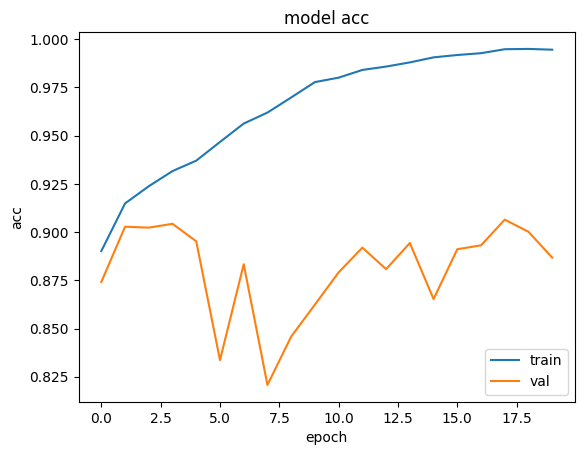

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

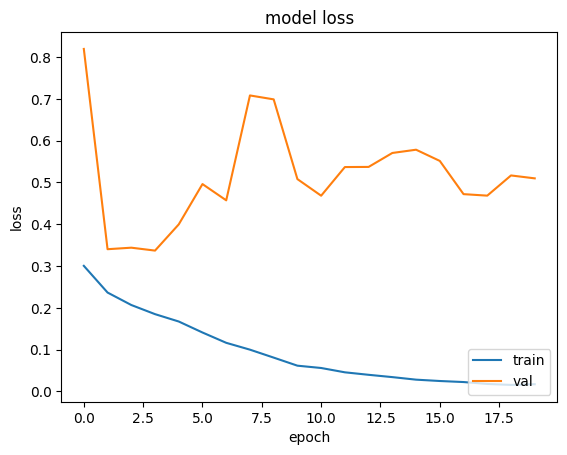

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

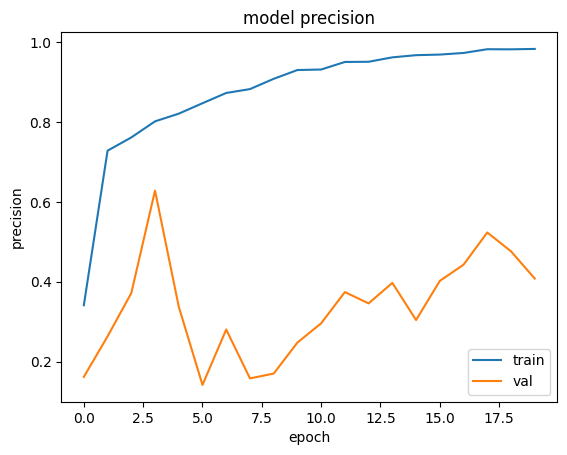

In [ ]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

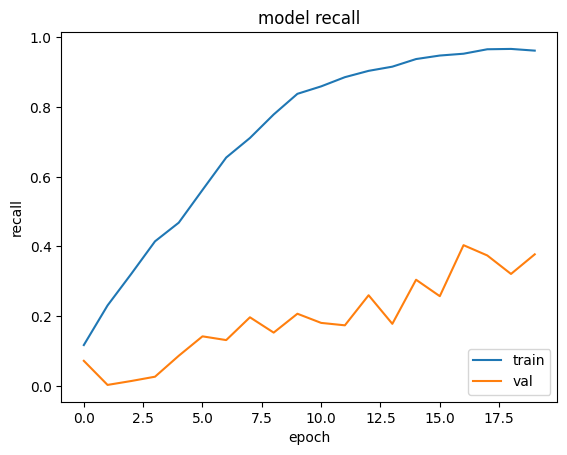

In [ ]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

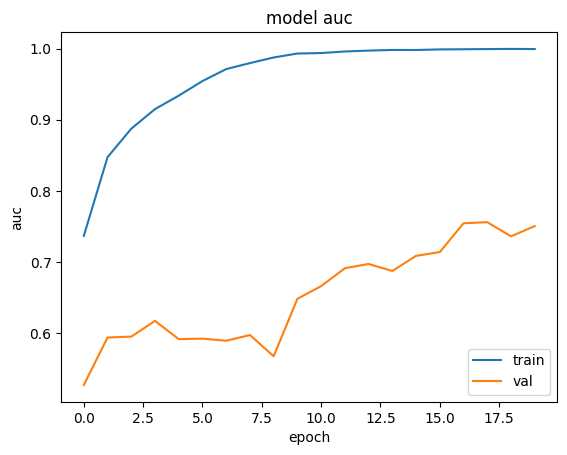

In [ ]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test, return_dict = True)

322/322 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - auc: 0.7543 - binary_accuracy: 0.8851 - f1_score: 0.2821 - loss: nan - precision: 0.4123 - recall: 0.3744  


In [ ]:
scores

{'auc': 0.7362441420555115,
 'binary_accuracy': 0.8840981721878052,
 'f1_score': <tf.Tensor: shape=(15,), dtype=float32, numpy=
 array([0.20540535, 0.28025472, 0.06611568, 0.04999999, 0.28508767,
        0.20740739, 0.46067408, 0.6530612 , 0.27237347, 0.28771925,
        0.25688067, 0.35195524, 0.21839075, 0.42396307, 0.09160305],
       dtype=float32)>,
 'loss': 0.5384758710861206,
 'precision': 0.40224453806877136,
 'recall': 0.35785600543022156}

### Some findings after training models with different hyperparameters:

- `Batch size` is the number of training examples used in one iteration of model training. The optimal here is **64**. Higher batch sizes like 128 or 1024 will result in gradually decreasing precision, recall and AUC which we can see in **Model = 4** and **model = 5**.

- `Epoch` represents one complete pass through the entire training dataset. It should not be too higher/smaller otherwise it will lead to overfitting/underfitting to data which will lead to increase in loss of our model. Above, we can see that **Model = 1** and **Model = 3** have a higher loss when compared to other models (except Model = 5 which also has a higher loss due to a higher batch size of 1024.

- `Learning rate` influences how quickly the model converges should be kept here at **1e-4**.


#### Lastly, the optimal model comes out to be Model = 2 where `epochs = 20`, `batch_size = 64` & `learning_rate = 1e-4`.